## Iris flower dataset

In [1]:
# Same things as before plus couple more
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler


## Importing important libraries first

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 0)



In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
# This cell is just that we can use same pair plot as before on our file without scaling
x_scaled = scaler.transform(x)
iris_df_scaled = pd.DataFrame(x_scaled)
iris_df_scaled["target"] = y
iris_df_scaled.columns = iris_df.columns
iris_df_scaled


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.922005,1.038510,-1.359156,-1.336154,0.0
1,-1.158164,-0.124001,-1.359156,-1.336154,0.0
2,-1.394324,0.341003,-1.415416,-1.336154,0.0
3,-1.512403,0.108501,-1.302896,-1.336154,0.0
4,-1.040085,1.271012,-1.359156,-1.336154,0.0
...,...,...,...,...,...
145,0.967269,-0.124001,0.778737,1.383643,2.0
146,0.494950,-1.286513,0.666216,0.865586,2.0
147,0.731110,-0.124001,0.778737,0.995100,2.0
148,0.376871,0.806008,0.891257,1.383643,2.0


c:\Users\tlahti\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlahti\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlahti\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tlahti\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

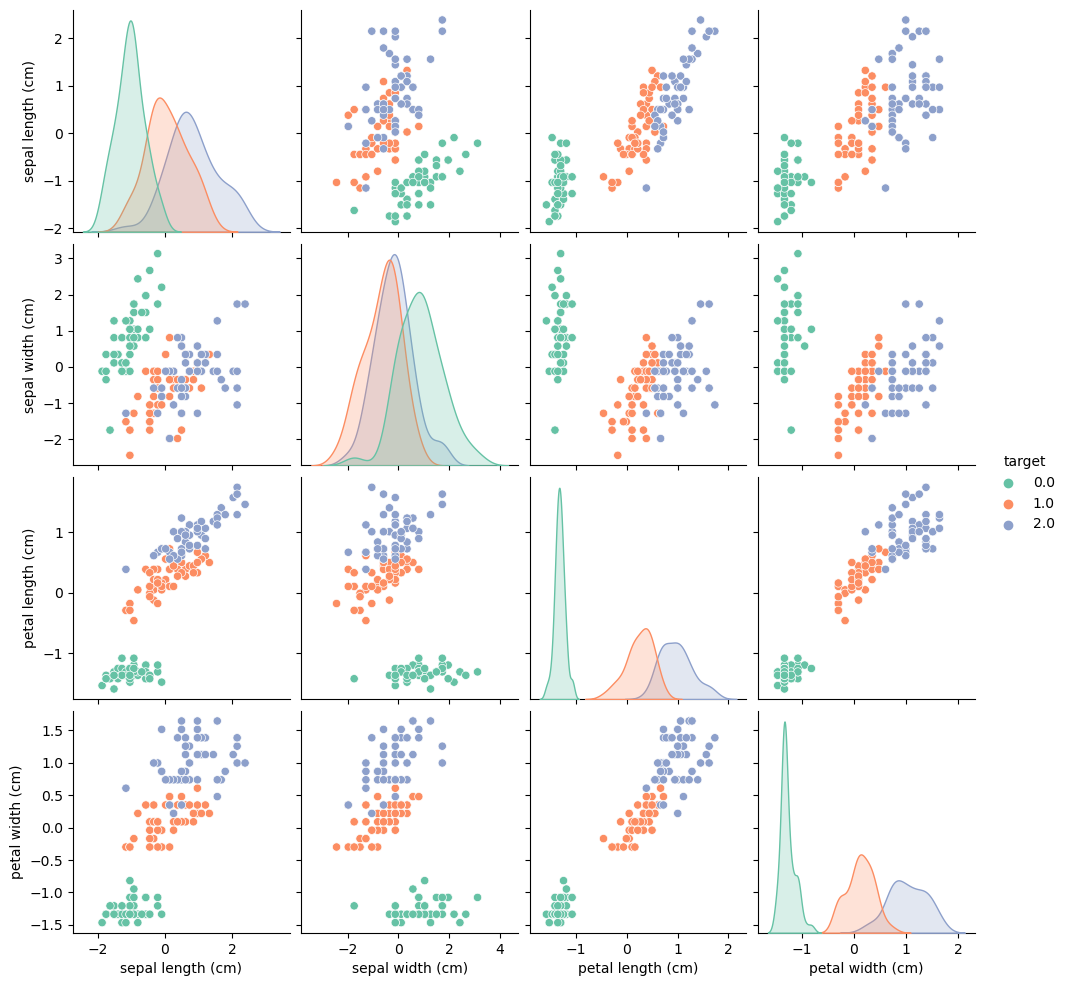

In [6]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=iris_df_scaled, hue='target', palette='Set2')

## Train Test Split

## Training and Fitting the model

In [7]:
model=SVC(kernel="linear")

In [8]:
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

## Predictions from the trained model

In [9]:
x_test_scaled = scaler.transform(x_test)

pred=model.predict(x_test_scaled)

## Model Evaluation

In [10]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

